Name: Asvin Sripraiwalsupakit

Andrew ID: asriprai

Collaborators (if none, say "none"; do *not* leave this blank): Phanukorn Sontanarat, Naphat Korwanich

Reminder: you should not be sharing code.

### Instructions
1. Fill in your name, Andrew ID, and collaborators above.
2. Fill in the code/text blocks to answer each question.
3. Do *not* change any of the existing code provided.
4. Run the entire notebook *before* submitting it on Canvas to make sure that the code actually runs without errors. (**Important**: Any code cells that you have entered code for but did not actually execute will be disregarded, so please be sure to actually run your code first and make sure it runs without errors! We may re-run a subset of your code for grading purposes.)
5. Be careful about where you save data for use with this Jupyter notebook (more details on this later).

### [Problem 1] The Distribution of Words in a Human Language: Zipf's Law [45 pts]

In this problem, you will be looking at a phenomenon of "natural languages" (i.e., human languages, such as English). As it turns out, when we look at the distribution of words in a different human languages, the distribution roughly follows what's called *Zipf's law* ([Wikipedia](https://en.wikipedia.org/wiki/Zipf%27s_law)).

*Zipf's law* states that given a large sample of words used, any word's frequency is inversely proportional to its rank in the frequency table (the word with rank 1 is the most frequently occurring word, the word with rank 2 is the second most frequently occurring word, etc). In this problem, you are going to test Zipf's law on a real dataset and explore some of its properties.

This problem assumes you have already installed the `spaCy` package ([https://spacy.io](https://spacy.io)). Instructions for installing this are part of the tutorial file "`Anaconda, Jupyter, and spaCy setup tutorial.pdf`". You can find how to access lemmatized tokens using `spaCy` by looking at the `spaCy` demo Jupyter notebook from lecture.

Note: For this problem, you don't actually need `spaCy`'s named entity recognition, grammatical parsing, or part-of-speech tagging. Turning these elements off when you instantiate the nlp object can substantially speed up your code.  To make sure these are off when instantiating the nlp object, call: 

`
nlp = spacy.load('en', disable=['ner', 'parser', 'tagger'])
`


(a) [5 pts] Read the data files.

The dataset is a collection of the 100 most popular books downloaded from Gutenburg Project ([https://www.gutenberg.org/browse/scores/top](https://www.gutenberg.org/browse/scores/top)). Each file contains the text of a book. Now read all the texts from disk. This will be the corpus in this problem.

Note: Please DO NOT change the folder name or the path, and make sure you use a relative path (e.g. './HW1_Dataset/*filename*) when reading the files. When grading your homework, we will put your Jupyter notebook file and the dataset in the same folder, and run your code. **You will receive 0 points for this problem if your code fails to load the data.**

Hint: To list all files that match a certain pattern, you can use the `glob` package. Here's an example usage:

`
import glob
print(glob.glob('./HW1_Dataset/*.txt'))
`

Hint: When debugging your code, you may want to first make sure your code runs on a few of the books rather than all 100 (for example, you can start by only having 3 of the text files in `HW1_Dataset`). Once you're confident that your solution is correct on a few text files, then run on all of them! This is a standard approach to debugging code that is meant to handle large datasets.

In [25]:
########################################################################
######################### Write your code here #########################
########################################################################

#read each text of line in each file and keep in text list
import glob
files = glob.glob('./HW1_Dataset/*.txt')
text = []
i = 0
for name in files:
    with open(name, encoding="utf8") as f:
            for line in f:
                text.append(line)
                i += 1




(b) [15 pts] Build the frequency table. Specifically, complete the following three tasks:

  1. Process the text by separating and lemmatizing the words.
  2. Then count the number of times each word appears in the corpus and build a frequency table. (In particular, use raw counts as the "frequency"--do not divide by the total number of words in the corpus.)
  3. Sort the table and print the top 50 most frequent words, along with their frequencies and ranks. Don't worry about ties (for example, if multiple things have the same frequency, it's fine if your solution breaks ties arbitrarily in the sorting).

Note: When counting the words, only include words (tokens) that consist of alphabetic letters (a-z and A-Z). You can do this with what's called a *regular expression*. For example, to check whether the words "will.i.am" or "Tesla" are alphabetic, you would do the following:

`
import re  # regular expression package
if re.match('[a-zA-Z]+$', 'will.i.am'):
    print('will.i.am consists only of alphabetic letters!')
if re.match('[a-zA-Z]+$', 'Tesla'):
    print('tesla consists only of alphabetic letters!')
`

In [26]:
########################################################################
######################### Write your code here #########################
########################################################################
import spacy 
nlp = spacy.load('en', disable=['ner', 'parser', 'tagger'])
parsed_text = nlp(text[0])


import re
histogram = {}

from collections import Counter

histogram_with_some_filtering = Counter()

i=0 #remove for all files
for t in text:
    if i <len(text):
        parsed_text = nlp(t)
        for token in parsed_text:
            if re.match('[a-zA-Z]+$', token.orth_):   #to make sure that each word consist of an alphabet
                lemma = token.lemma_.lower()
                #if not (nlp.vocab[lemma].is_stop or token.pos_ == 'PUNCT' or token.pos_ == 'SPACE'):
                histogram_with_some_filtering[lemma] += 1   #add the frequency of each found lemma
    i += 1
                    
from operator import itemgetter
sorted_lemma_count_pairs = sorted(histogram_with_some_filtering.items(),
                                  reverse=True,
                                  key=itemgetter(1))
# for lemma, count in sorted_lemma_count_pairs:
#     print(lemma, ":", count)

    
    
#print the top 50 frequent lemma
import pandas as pd
sorted_lemma_count_pairs[:50]
df6 = pd.DataFrame(sorted_lemma_count_pairs, columns = ['Word','Frequency'])
df6 = df6.reset_index()
df6['index'] += 1
df6.columns = ['Rank','Word','Frequency']
df6[:50]


,Rank,Word,Frequency
0,1,the,703039
1,2,and,436050
2,3,be,425147
3,4,of,386402
4,5,a,348722
5,6,to,324526
6,7,in,204342
7,8,i,188689
8,9,that,170133
9,10,have,156686


(c) [10 pts] Visualize the frequency table by plotting a **raw scatter plot** (put frequency as the y-axis and rank as the x-axis), and a **log-log plot** (use logarithmic scales on both the x- and y- axes). Note that this should be for all words and not only the top 50. As before, for the ranks, do not worry about ties, i.e., break ties arbitrarily.

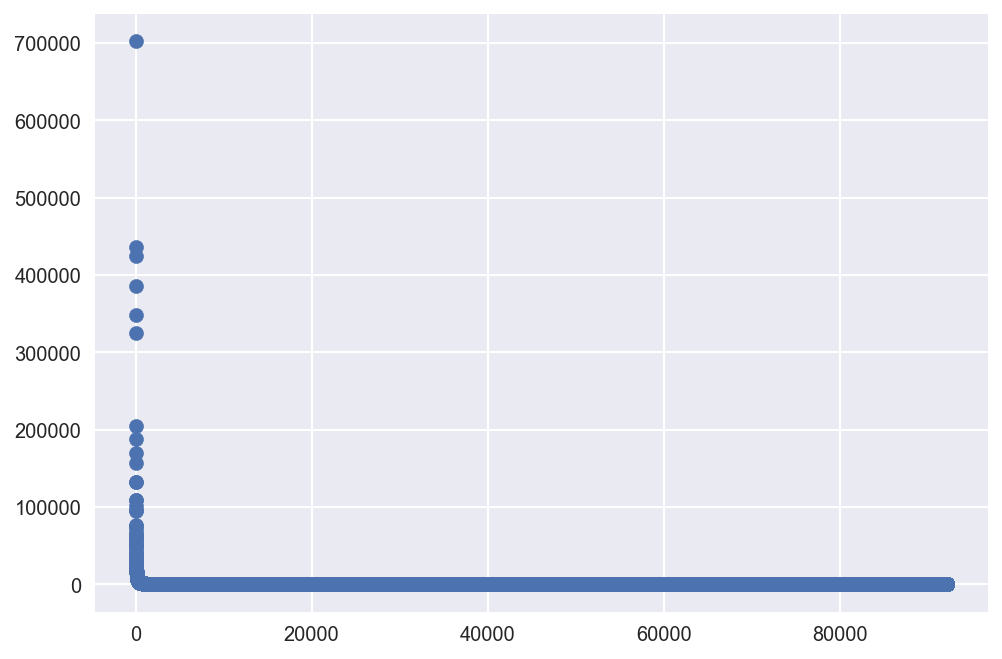

In [27]:
# Raw scatter plot
########################################################################
######################### Write your code here #########################
########################################################################
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')  # prettier plots (for example, use 'ggplot' instead of 'seaborn' for plots like in R)
%config InlineBackend.figure_format = 'retina'  # if you use a Mac with Retina display

plt.scatter(df6['Rank'],df6['Frequency'])






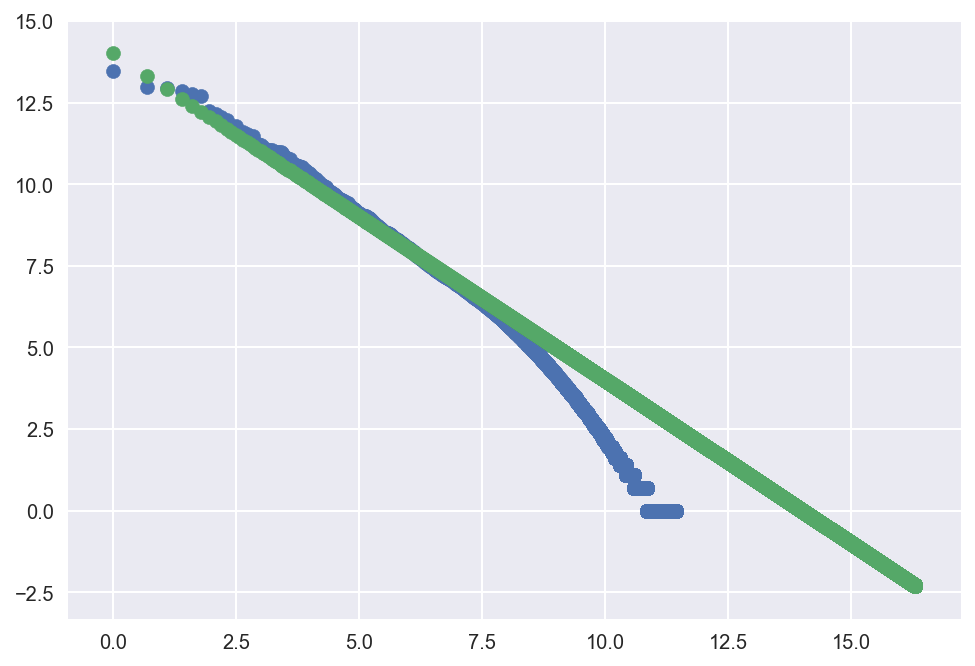

In [28]:
# Log-log plot
########################################################################
######################### Write your code here #########################
########################################################################
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')  
%config InlineBackend.figure_format = 'retina'  


#the blue line represents the data from our bag of words
x = (np.log(df6['Rank']))   #rank
y = (np.log(df6['Frequency']))  #frequency of each word
plt.scatter(x,y)


#the green line represents the Zipf's law
x1 = (np.arange(1,df6['Frequency'].sum()*1.0))
# print(x1)
xlog = np.log(x1)
y1 = (0.1 * df6['Frequency'].sum()* (x1**(-1)))
ylog = np.log(y1)
plt.scatter(xlog,ylog)


(d) [15 pts] Explore the frequency table: Zipf's law states that term frequency is governed by a power low, i.e. the relationship between term frequency and rank can be approximated by $f(r) = cr^{-1}$, where $f(r)$ is the frequency of the term at rank $r$, $r$ is the rank of a term, and $c$ is a constant and is approximately 0.1*(corpus size) for English. 

Answer following questions:

- What do you observe in the log-log plot above? Is this consist with the power law?

Your text answer (for this question, your answer is not code): The log-log plot above is consistent with the power law except for the lower rank  (the right of the graph). From the plot above, we can see that the green line (Zipf's law), the equation   $f(r) = cr^{-1}$ is almost the same as the plot from our word bag. However, the actual frequency of our word bag tends to drop faster in the second half of the rank, so the graph of the actual frequency lies below the $f(r) = cr^{-1}$ line.

- Think of the corpus as a (large) unigram bag of words. Following the analogy from lecture, imagine drawing a single word from this big bag (note that we are assuming that we've lemmatized the words and also filtered out non-alphanumeric words). What is the probability of drawing one of the 4 most frequent words? What is the probability of drawing one of the 50 most frequent words? Answer these two questions using code rather than just entering in the final answers as numbers.

In [29]:
print('Probability of drawing one of the 4 most frequent words: ')
########################################################################
######################### Write your code here #########################
########################################################################



def nmostfrequent(n):
    prob = 0
    for i in range (1,n+1):
        prob += df6['Frequency'][df6['Rank'] == i].sum()/df6['Frequency'].sum()    #the function finds the probability of getting ith frequent word
        #print(prob)
    return prob

print(nmostfrequent(4))
print('Probability of drawing one of the 50 most frequent words: ')
########################################################################
######################### Write your code here #########################
########################################################################

print(nmostfrequent(50))

Probability of drawing one of the 4 most frequent words: 
0.16172069590775684
Probability of drawing one of the 50 most frequent words: 
0.48035499927829844


- What proportion of the words occur only once? What proportion of the words occur fewer than 10 times?

In [30]:
print("Occur only once: ")
########################################################################
######################### Write your code here #########################
########################################################################

def nfrequent(n):   #the function finds the probability of getting the words with n occurance
    prob = df6['Frequency'][df6['Frequency'] == n].count()
#     print(prob)
#     print(len(df6))
    return prob/len(df6)

print(nfrequent(1))



print("Occur fewer than 10 times: ")
########################################################################
######################### Write your code here #########################
########################################################################

prob2 = 0
for i in range(1,10):
    prob2 += nfrequent(i)
print(prob2)



Occur only once: 
0.4430075122765558
Occur fewer than 10 times: 
0.7708701449338204


### [Problem 2] Entity Recognition and Pointwise Mutual Information (PMI) [50 pts]
By using the entity recognition system in `spaCy`, let's identify named entities from newspaper articles. You'll be using Reuters corpus which contains more than ten thousand newspaper articles. To run the code below, you need to download the Reuters dataset. To do so, in a terminal/command line (recall that you can open a terminal from Jupyter's webpage that shows all the files, which by default is [http://localhost:8888/tree](http://localhost:8888/tree)), start up Python and enter:

`
import nltk
nltk.download('reuters')
`

Then proceed to the problem subparts below.

Note that in this problem you will need named entity recognition but not grammatical parsing or the part-of-speech tagging. Hence, you will want to instantiate the nlp object by calling:

`
nlp = spacy.load('en', disable=['parser', 'tagger'])
`


(a) [15 pts] Draw a bar chart in which one of the axes shows entity labels and the other shows the frequency of the corresponding label. Use the variables `reuters_nlp` and `label_counter` provided in the code below.

Text(0,0.5,'frequency')

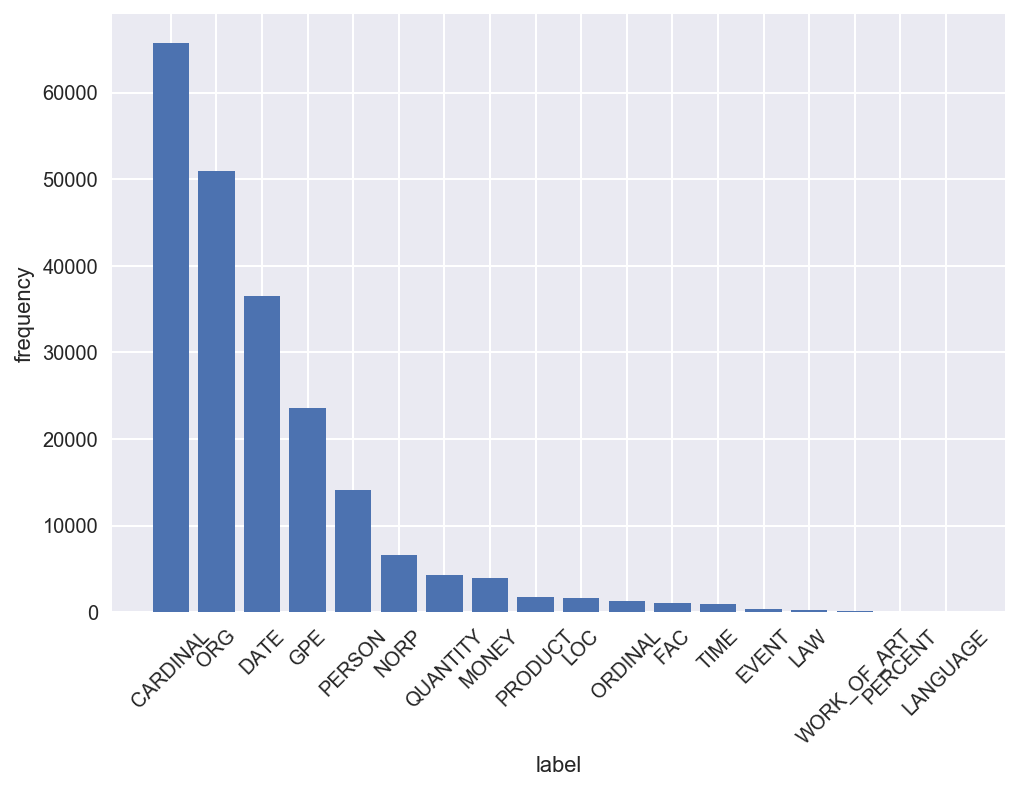

In [31]:
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import reuters
import re
import spacy
nlp = spacy.load('en', disable=['parser', 'tagger'])
reuters_fileids = reuters.fileids()  # hint: when first debugging, consider looking at just the first few
reuters_nlp = [nlp(re.sub('\s+',' ', reuters.raw(i)).strip()) for i in reuters_fileids]
label_counter = Counter()
########################################################################
######################### Write your code here #########################
########################################################################

#iterate through every article to count the label
i = 0 #remove for full data
for news in reuters_nlp:
    if i <len(reuters_nlp):
        parsed_text2  = nlp(str(news))
        for entity in parsed_text2.ents:
            label_counter[entity.label_] += 1
    i += 1


#sort the label
from operator import itemgetter
sorted_token_count_pairs2 = sorted(label_counter.items(),
                                  reverse=True,
                                  key=itemgetter(1))

import pandas as pd
df5 = pd.DataFrame(sorted_token_count_pairs2, columns = ['label','frequency'])
plt.bar(df5['label'],df5['frequency'])
plt.xticks(rotation=45)
plt.xlabel('label')
plt.ylabel('frequency')

(b) [15 pts] Now list the top 10 most frequently occured entities (entity text and the number of occurence) with labels `ORG` (organization) and `GPE` (countries, cities, states) respectively.

Hint: Here, when counting the frequency, we need to count how many articles have an entity with the desired property. For every article, we add 1 if the article has the entity and 0 otherwise.  List filtering (as in Recitation 1) will be helpful here.

In [32]:
########################################################################
######################### Write your code here #########################
########################################################################

#keep the number of article that org and gpe label occur
i = 0 #remove for full data
org = {}
gpe = {}
for news in reuters_nlp:
    if i <len(reuters_nlp):
        parsed_text2  = nlp(str(news))
        b = set() #use set to avoid redundant count in the same article
        d = set()
        for entity in parsed_text2.ents:
            if entity.label_ == 'ORG':    #add the word to the set if its label is ORG
            
                b.add(str(entity).lower())
            if   entity.label_ == 'GPE':     #add the word to the set if its label is GPE
                   
                d.add(str(entity).lower())
        for c in b:   #count the word
                    if c not in org:
                        org[c] = 1
                    else:
                        org[c] += 1
        for c in d:
                    if c not in gpe:
                        gpe[c] = 1
                    else:
                        gpe[c] += 1

    i += 1
   

from operator import itemgetter

#sort the counter
org_count_pairs = sorted(org.items(),
                                  reverse=True,
                                  key=itemgetter(1))

gpe_count_pairs = sorted(gpe.items(),
                                  reverse=True,
                                  key=itemgetter(1))





In [33]:
org_count_pairs[:10]

[('avg', 583),
 ('reuters', 445),
 ('the securities and exchange commission', 246),
 ('ec', 240),
 ('usda', 226),
 ('fed', 220),
 ('net', 203),
 ('treasury', 183),
 ('the u.s. agriculture department', 170),
 ('congress', 139)]

In [34]:
gpe_count_pairs[:10]

[('u.s.', 1666),
 ('shr', 690),
 ('japan', 588),
 ('the united states', 375),
 ('u.k.', 309),
 ('canada', 291),
 ('new york', 243),
 ('west germany', 234),
 ('washington', 231),
 ('london', 212)]

(c) [20 pts] Give the top 50 `GPE` (countries, cities, states) entities that have the highest Pointwise Mutual Information (PMI) values with regard to the `ORG` (organization) entity **'opec'** (your list of this top 50 should be ranked in decreasing PMI value). Did you find any unexpected results? If so, why do you think it happened? If you found some of the results to be unsurprisingly, how come? 

Hint 1: As in lecture, when computing PMI, we will compute probabilities by counting the number of documents where entities occur or co-occur.  For example, $P('opec') = \frac{number \ \ of \ \ documents \ \ containing \ \ 'opec'}{number \ \ of \ \ documents}$.  


Hint 2: To compute this ranking, you do not have to compute the full PMI equation.

In [35]:
########################################################################
######################### Write your code here #########################
########################################################################

i = 0 #remove for full data

gpe_opec = {}
prob_opec = 0
for news in reuters_nlp:
    if i <len(reuters_nlp):
        parsed_text2  = nlp(str(news))
        b = 0
        d = set()
        for entity in parsed_text2.ents:
            if str(entity).lower() == 'opec':

                b = 1 
            if  entity.label_ == 'GPE':

                d.add(str(entity).lower())
        if b == 1:
            prob_opec += 1
            for c in d:
                        if c not in gpe_opec:

                            gpe_opec[c.lower()] = 1
                        else:

                            gpe_opec[c.lower()] += 1

    i += 1
prob_opec = prob_opec/len(reuters_nlp)   

from operator import itemgetter


gpe_opec_count_pairs = sorted( gpe_opec.items(),
                                  reverse=True,
                                  key=itemgetter(1))

df = pd.DataFrame(gpe_opec_count_pairs,columns = ['country','frequency'])
df2 = pd.DataFrame(gpe_count_pairs,columns = ['country','frequency'])



import numpy as np
df3 = pd.merge(df, df2, left_on='country', right_on='country')
df3['PMI'] = (df3['frequency_x']/ (df3['frequency_y']))  #I use this ratio instead to find the rank of PMI as the other term is the constant and will no cause the variation in ranking

df3 = df3.sort_values(by=['PMI'], ascending=False)
df3.columns = ['Place','Frequency(A,B)','Frequency(A)','Ratio']
df3[:50]



,Place,"Frequency(A,B)",Frequency(A),Ratio
57,tripoli,2,2,1.000000
69,i.e.,1,1,1.000000
44,visnews,3,3,1.000000
92,"saudi arabia 500,000",1,1,1.000000
51,emirates,2,2,1.000000
100,doha,1,1,1.000000
99,nazir,1,1,1.000000
55,yanbu,2,2,1.000000
56,reventador,2,2,1.000000
59,lichtblau,1,1,1.000000


Your text answer (for this question, your answer is *not* code): We try to find PMI by deriving the frequency of the article with country names and opec divided by the frequency of occuring that country(since other component is constant). The top 50 PMI results are mostly the country or the city within country that are members of OPEC (e.g. Saudi Arabia, Qatar, riyadh. This mean the label tag OPEC has higher correlation with the country which is the OPEC member, so the probability that it appears together in the same time is higher than the probability if we assume that the two words are independent ( P(A and B) > P(A)xP(B)). However, there is a case where PMI does not work well. When the number of occurrance of the country or city name is low (e.g. 1) and all of them appear in the article with OPEC, the frequency of the article with country names and opec divided by the frequency of occuring that country will be very high (From tripoli to neutral zone). This is misleading because the country may not highly correlate with the news, but it is the problem of too little appearance.  

### [Problem 3] Questionnaire [5 pts]
Please provide feedback! To receive the 5 points, be sure to enter your Andrew ID correctly in this Google form: https://goo.gl/forms/tGmCD8L9uI8zNbRG3